In [1]:
!mkdir image

A subdirectory or file image already exists.


In [2]:
pip install bing_image_downloader 


Note: you may need to restart the kernel to use updated packages.


In [4]:
from bing_image_downloader import downloader
downloader.download("pretty sunflower",limit=30,output_dir='image',adult_filter_off=True)

[%] Downloading Images to F:\Fresh start\Project\Image classification\image\pretty sunflower


[!!]Indexing page: 1

[%] Indexed 16 Images on Page 1.


[%] Downloading Image #1 from http://www.flowerpicturegallery.com/d/501-1/pic+pretty+sunflower.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://3.bp.blogspot.com/-og7QbHa50eU/Tui705DQZ5I/AAAAAAAABMk/tchY2w9Qzp8/s1600/Flower53.jpg
[%] File Downloaded !

[%] Downloading Image #3 from http://www.prettydesigns.com/wp-content/uploads/2014/11/Beautiful-Arm-Daisy-Tattoo.jpg
[%] File Downloaded !

[%] Downloading Image #4 from http://thisgardenisillegal.com/quiz/sunflower.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://s-media-cache-ak0.pinimg.com/736x/05/23/8c/05238c4cd8e098bd126c1cee9c706806--sun-flowers-pretty-flowers.jpg
[%] File Downloaded !

[%] Downloading Image #6 from http://www.creativebydesignbahamas.com/yahoo_site_admin/assets/images/sunflower.165112935_large.jpg
[%] File Downloaded !

[%] Downloading

In [5]:
downloader.download("rugby ball leather",limit=30,output_dir='image',adult_filter_off=True)

[%] Downloading Images to F:\Fresh start\Project\Image classification\image\rugby ball leather


[!!]Indexing page: 1

[%] Indexed 13 Images on Page 1.


[%] Downloading Image #1 from https://cdn-s3.touchofmodern.com/products/001/323/796/e46cdde2e60a6c3e6efb510cde0da461_large.jpg?1544121098
[%] File Downloaded !

[%] Downloading Image #2 from https://cdn.shopify.com/s/files/1/0020/1025/1324/products/Vitnage_Brown_Leather_Rugby_Ball_36fcfbe7-d899-4540-9aa6-80ce8e2a0168_1024x1024.jpg?v=1554242167
[%] File Downloaded !

[%] Downloading Image #3 from https://homebarnshop.co.uk/wp-content/uploads/2017/11/fullsizeoutput_2028-e1510939138773.jpeg
[%] File Downloaded !

[%] Downloading Image #4 from https://a.1stdibscdn.com/original-vintage-leather-rugby-ball-with-6-panels-for-sale-picture-4/f_9757/1568736937985/27642c_master.jpg?width=768
[%] File Downloaded !

[%] Downloading Image #5 from https://i.etsystatic.com/7864717/r/il/47b751/2047214165/il_fullxfull.2047214165_q597.jpg
[%] File Downlo

In [6]:
downloader.download("ice cream cone",limit=30,output_dir='image',adult_filter_off=True)

[%] Downloading Images to F:\Fresh start\Project\Image classification\image\ice cream cone


[!!]Indexing page: 1

[%] Indexed 18 Images on Page 1.


[%] Downloading Image #1 from https://www.obnoxiousantiques.com/wp-content/uploads/2016/09/ice-cream-cone-grease-4.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://4.bp.blogspot.com/-24Ior6VBpsk/TbxaZXjlGyI/AAAAAAAAADg/O_gAKSrrQho/s1600/758icecream.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://www.lovesouthend.co.uk/wp-content/uploads/2014/10/ice-cream-cone.png
[%] File Downloaded !

[%] Downloading Image #4 from https://cdn001.cakecentral.com/gallery/2016/08/900_ice-cream-cone-birthday-cake-798496ZqE8j.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://steemitimages.com/0x0/https://steemitimages.com/DQmd1S6KmZR2GmhE29jHrVw3bDARGCbXjrcQq8adspKpxde/2.jpg
[Error]Invalid image, not saving https://steemitimages.com/0x0/https://steemitimages.com/DQmd1S6KmZR2GmhE29jHrVw3bDARGCbXjrcQq8adspKpxde/2.

[%] File Downloaded !

[%] Downloading Image #30 from http://farm1.staticflickr.com/170/448920776_1314e3f66e_z.jpg
[%] File Downloaded !



[%] Done. Downloaded 30 images.


In [41]:
import os
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import image
from skimage.transform import resize
target=[]
images=[]
flat_data=[]
DATADIR='F:\Fresh start\Project\Image classification\image'
Categories=['pretty sunflower','rugby ball leather','ice cream cone']
for categories in Categories:
    class_num=Categories.index(categories)
    path=os.path.join(DATADIR,categories)
    for img in os.listdir(path):
        img_array=image.imread(os.path.join(path,img))
        img_resized=resize(img_array,(150,150,3))
        flat_data.append(img_resized.flatten())
        images.append(img_resized)
        target.append(class_num)
flat_data=np.array(flat_data)
target=np.array(target)
images=np.array(images)

[[0.09640523 0.09640523 0.08856209 ... 0.02352941 0.01960784 0.03137255]
 [0.58568627 0.22941176 0.14960784 ... 0.19607843 0.25098039 0.12156863]
 [0.99215686 0.98927817 0.03406824 ... 0.85925778 0.82183294 0.87137542]
 ...
 [1.         1.         1.         ... 1.         1.         1.        ]
 [0.42352941 0.30980392 0.18039216 ... 0.63846806 0.52162092 0.4199241 ]
 [0.95686275 0.95686275 0.95686275 ... 0.90196078 0.90196078 0.90196078]]


In [45]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(flat_data,target,test_size=0.3,random_state=109)

In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid=[
    {'C':[1,10,100,1000],'kernel':['linear']},
    {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']},    
    ]
svc=svm.SVC(probability=True)
clf=GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}])

In [47]:
y_pred=clf.predict(x_test)
y_pred

array([0, 2, 2, 1, 0, 0, 1, 2, 2, 0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 2, 0, 0,
       2, 0, 1])

In [48]:
y_test

array([1, 0, 2, 1, 0, 1, 1, 1, 2, 0, 2, 2, 0, 0, 1, 1, 2, 2, 1, 2, 0, 0,
       1, 2, 0])

In [49]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [52]:
accuracy_score(y_pred,y_test)

0.64

In [55]:
confusion_matrix(y_pred,y_test)

array([[6, 2, 3],
       [1, 5, 0],
       [1, 2, 5]], dtype=int64)

In [56]:
import pickle
pickle.dump(clf,open('img_model.pkl','wb'))

In [57]:
model=pickle.load(open('img_model.pkl','rb'))

enter your urlhttps://images.ctfassets.net/i3tkg7dt3kro/63FGq7L4NaWBLjl27vDtdZ/2e076e0c74a7c22ad3ed3bd44ec11086/6-11_Meaning-of-Sunflowers_Images.jpg
(1000, 800, 3)
PREDICTED OUTPUT:pretty sunflower


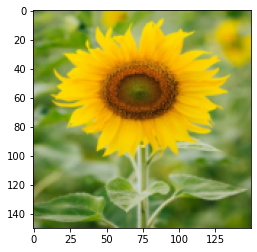

In [62]:
flat_data=[]
url=input('enter your url')
img=imread(url)
img_resized=resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data=np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out=model.predict(flat_data)
y_out=Categories[y_out[0]]
print(f'PREDICTED OUTPUT:{y_out}')